In [3]:
from queue import PriorityQueue
import pandas as pd
import heapq as hq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from collections import OrderedDict
from common.utility import Node
from common.utility import dijkstra
import time
import argparse

In [4]:
%cd ..

/Users/jonasarentoft/Desktop/bachelor2023/src


In [5]:
FILEPATH = f'../data/processed'

nodesAndPositions = OrderedDict()

with open(f'{FILEPATH}/nodesAndPositions.txt', 'r') as nodes:
    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        # coords.append(list[1:])
        # nodeIDs.append(list[0])'
        
        nodesAndPositions[list[0]] = [list[2], list[1]]
        
        
myNodes = {}

with open(f'{FILEPATH}/nodesInHighwaysSorted.txt', 'r') as nodes:
    for ID in nodes:
        ID = int(ID)
        myNodes[ID] = Node(ID)
    
        
        
with open(f'{FILEPATH}/edgesWithDistances.txt', 'r') as edges:   
    for line in edges:
        data = [i for i in line.split(sep=",")]
        fromID, toID, distance = data        
        fromID = int(fromID)
        toID = int(toID)
        distance = float(distance)
        
        # Get Objects
        fromNode = myNodes[fromID]
        toNode =  myNodes[toID]
    
        Node.add_edge(fromNode, toNode, distance)

In [6]:
def dijkstra(start):
    heap = []
    
    distances = {}
    previous = {}
    
    distances[start] = 0

    hq.heappush(heap, (distances[start], start))

    while heap:

        current = hq.heappop(heap)
        
        distance, node = current
        #print([e for e in current])
        

        # check if the nodes has been updated
        if distance != distances[node]:
            continue

        for e in node.edges:
            
            edgeNode, edgeDistance = e
            
            new_distance = distances[node] + edgeDistance

            if distances.get(edgeNode) is None or new_distance < distances[edgeNode]:
                
                # opdater dictionary
                distances[edgeNode] = new_distance
                previous[edgeNode.value] = node.value
                
                hq.heappush(heap, (new_distance, edgeNode))
                
    return distances, previous

In [3]:
import numpy as np
a = []
a.append(1)

In [7]:
def GetPath(target, previousDict):
    previous = previousDict.get(target)
    
    if previous is None:
        return []
    
    else:
        return [target] + GetPath(previous, previousDict)
    

In [3]:
a = 1.5345
round(a)

2

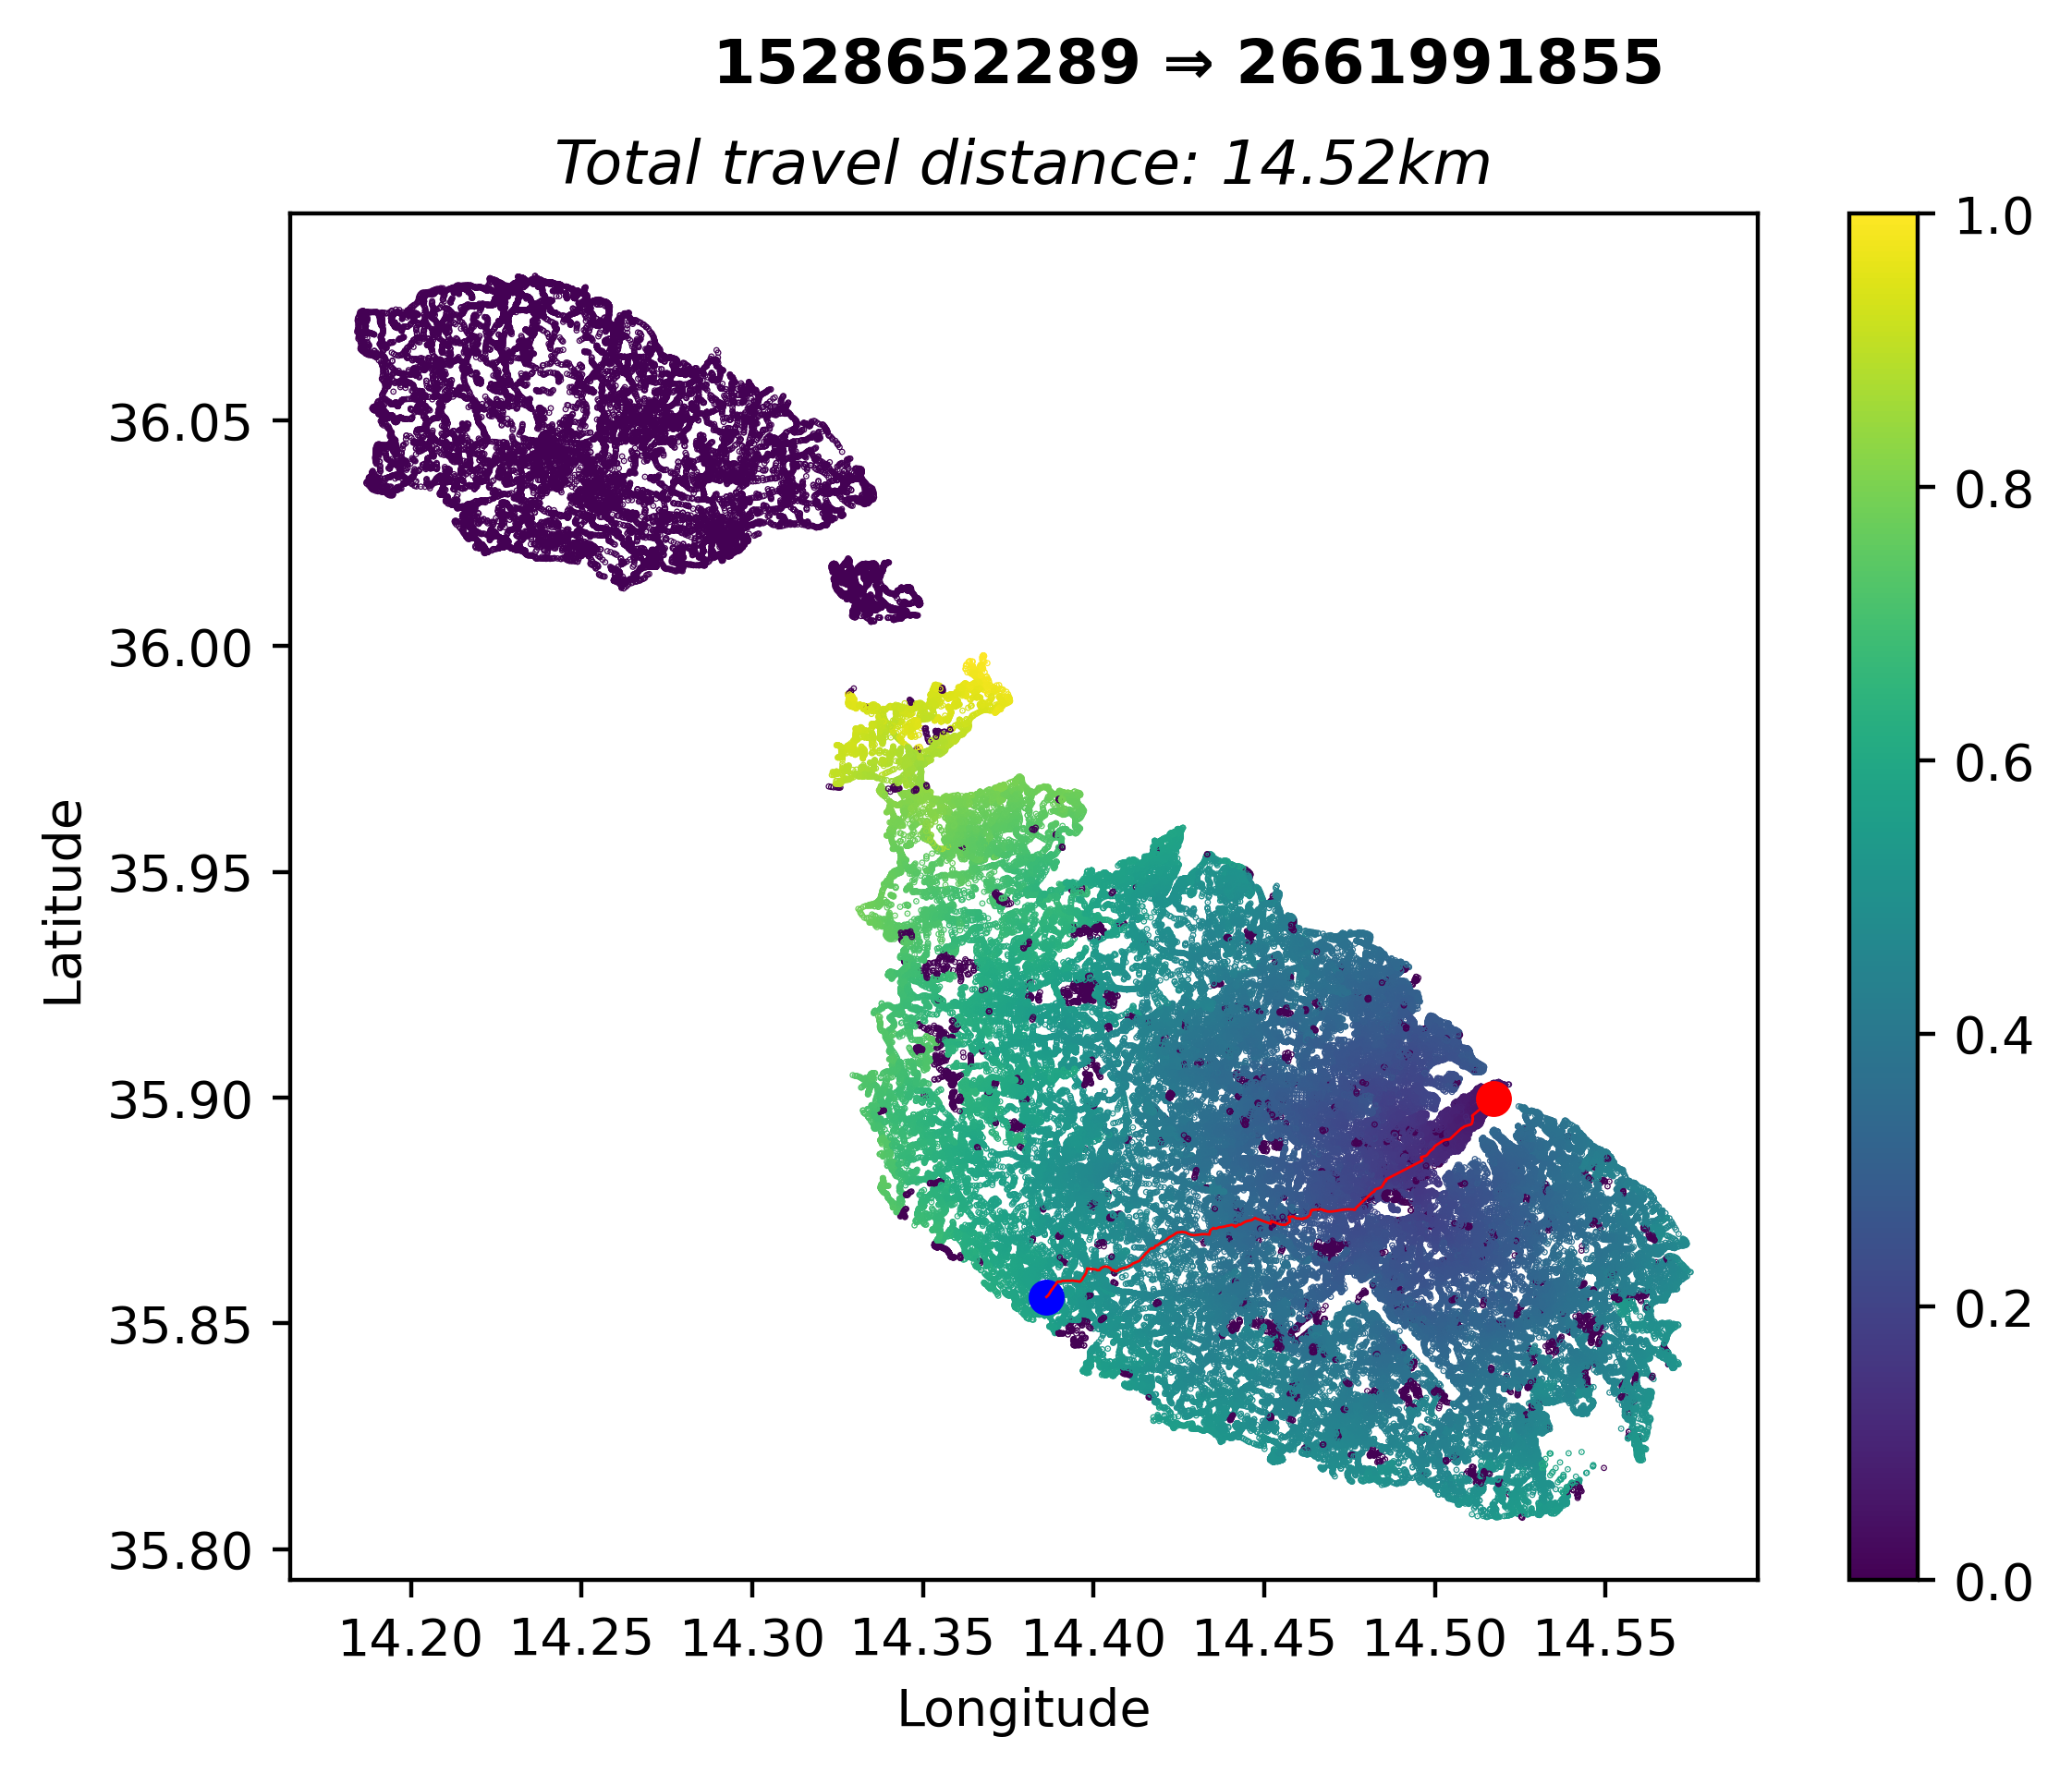

In [17]:
wantedStartNode = 1528652289
wantedEndNode = 2661991855
    
distancesDict, previousDict = dijkstra(myNodes[wantedStartNode])
distances = [distancesDict.get(myNodes[ID], -1) for ID in nodesAndPositions.keys()]


coords = nodesAndPositions.values()
wantedStartNodeCoords = nodesAndPositions[wantedStartNode]
wantedEndNodeCoords = nodesAndPositions[wantedEndNode]
nodesInShortestPath = GetPath(wantedEndNode, previousDict)
totalDistance = distancesDict.get(myNodes[wantedEndNode])
totalDistance = round(totalDistance, 3)

positionsOfNodesInShortesPath = [nodesAndPositions[node] for node in nodesInShortestPath]

plt.rcParams['figure.dpi'] = 400


plt.suptitle(f' {wantedStartNode} ⇒ {wantedEndNode}', fontweight = 'bold', horizontalalignment = 'center')



if positionsOfNodesInShortesPath:
    plt.title(f'Total travel distance: {totalDistance}km', style = 'italic', fontsize = 12, loc = 'center')
else:
    plt.title(f'Found no path', style = 'italic')
plt.scatter(*zip(*coords), s = 0.05, c = distances)
plt.plot(*zip(*positionsOfNodesInShortesPath), linewidth = 0.5, color = 'red')
plt.scatter(wantedStartNodeCoords[0], wantedStartNodeCoords[1], c = 'red')
plt.scatter(wantedEndNodeCoords[0], wantedEndNodeCoords[1], c = 'blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.savefig('../data/plots/myPlot.png')


In [49]:
FILEPATH = f'../../data/processed'
previous = 0
i = 0

countV = 0
totalCount = 1

with open(f"{FILEPATH}/edgesWithDistances.txt", "r") as edgesAndDistances:
    with open(f"{FILEPATH}/E.txt", "w") as E:
        with open(f"{FILEPATH}/V.txt", "w") as V:
            with open(f"{FILEPATH}/W.txt", "w") as W:
      
                
                for line in edgesAndDistances:
                    
                    fromNode, toNode, distance = line.strip('\n').split(',')
                    
                    if i == 0:
                        V.write(f'{i}\n')
                        E.write(f'{toNode}\n')
                        W.write(f'{distance}\n')
                        previousFromNode = fromNode
                        previousToNode = toNode
                        i += 1
                        continue
                    
                    if fromNode == previousFromNode:
                        countV += 1
                        W.write(f'{distance}\n')
                        E.write(f'{toNode}\n')
                    
                    else:
                        countV += 1
                        V.write(f'{countV}\n')
                        W.write(f'{distance}\n')
                        E.write(f'{toNode}\n')
                        previousFromNode = fromNode

In [61]:
FILEPATH = f'../../data/processed'
previousNode = -1

i = 0

countV = 0
totalCount = 1

with open(f"{FILEPATH}/edgesWithDistances.txt", "r") as edgesAndDistances:
    with open(f"{FILEPATH}/E.txt", "w") as E:
        with open(f"{FILEPATH}/V.txt", "w") as V:
            with open(f"{FILEPATH}/W.txt", "w") as W:
      
                totalCount = 0
                for line in edgesAndDistances:
                    
                    fromNode, toNode, distance = line.strip().split(',')
                    fromNode = int(fromNode)
                    
                    while fromNode - np.abs(previousNode) > 1:
                        V.write(f'{totalCount}\n')
                        previousNode +=1

                    if fromNode == previousNode:
                        E.write(f'{toNode}\n')
                        W.write(f'{distance}\n')
                        totalCount += 1
                     
                    else:
                        V.write(f'{totalCount}\n')
                        E.write(f'{toNode}\n')
                        W.write(f'{distance}\n')
                        totalCount += 1
                        previousNode = fromNode

In [35]:
import numpy as np
v = [1, 3, 4, 6, 7, 8]
e = [2, 4, 5, 5, 6, 2, 4, 6]
FILEPATH = f''
with open(f"{FILEPATH}E.txt", "w") as E:
        with open(f"{FILEPATH}V.txt", "w") as V:
                with open(f"{FILEPATH}W.txt", "w") as W:
                        for i in v:
                               V.write(f'{i-1}\n')
                        for i in e:
                                E.write(f'{i-1}\n')
                                W.write(f'{1}\n')


In [52]:
import heapq as hq
import numpy as np
FILEPATH = f'../../data/processed'
E = np.loadtxt(f"{FILEPATH}/E.txt", dtype=int)
V = np.loadtxt(f"{FILEPATH}/V.txt", dtype=int)
W = np.loadtxt(f"{FILEPATH}/W.txt", dtype=float)


def dijkstra(E,V,W, startnode):
    heap = []
    distances = {}
    previous = {}
    distances[startnode] = 0
    hq.heappush(heap, (0, startnode))

    while heap:
        curr_dist, curr_node = hq.heappop(heap)
        try:
            r = range(V[curr_node], V[curr_node+1])
        except:
            r = range(V[curr_node], len(E))


        for i in r:
            
            toNode = E[i]
            dist = W[i]

            distToNode = distances.get(toNode)
            new_dist = curr_dist + dist
            if distToNode == None or distToNode > new_dist:
                distances[toNode] = new_dist

                previous[toNode] = curr_node
                hq.heappush(heap, (new_dist, toNode))
    
    return distances, previous


dists, prevs = dijkstra(E,V,W, 30)

In [47]:
def GetPath(target, previousDict):
    
    previous = previousDict.get(target)
    path = []
    while previous:
        path = path + [previous]
        previous = previousDict.get(previous)
    return path
    


In [54]:
import sys
import time


In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [9]:
nodesAndPositions = {}

with open(f'/Users/jonasarentoft/Desktop/bachelor2023/data/processed/denmark/nodesAndPositions.txt', 'r') as nodes:
    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        nodesAndPositions[list[0]] = [list[3], list[2]]

In [10]:
coords = nodesAndPositions.values()


In [15]:
coords[0]

TypeError: 'dict_values' object is not subscriptable

In [13]:
fig = px.scatter_geo(coords)
                  
fig.show()

In [3]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()

In [2]:
import numpy as np

In [8]:
%cd 

[Errno 2] No such file or directory: 'src'
/Users/jonasarentoft


In [2]:
FILEPATH = '/Users/jonasarentoft/Desktop/bachelor2023/data/processed/malta'

In [1]:
import heapq as hq
import numpy as np

E = np.loadtxt(f'{FILEPATH}/E.txt', dtype=int)
V = np.loadtxt(f'{FILEPATH}/V.txt', dtype=int)
W = np.loadtxt(f'{FILEPATH}/W.txt', dtype=float)

E_rev = np.loadtxt(f'{FILEPATH}/E_reversed.txt', dtype=int)
V_rev = np.loadtxt(f'{FILEPATH}/V_reversed.txt', dtype=int)
W_rev = np.loadtxt(f'{FILEPATH}/W_reversed.txt', dtype=float)

NameError: name 'FILEPATH' is not defined

In [5]:

E = np.loadtxt(f'{FILEPATH}/E.txt', dtype=int)
V = np.loadtxt(f'{FILEPATH}/V.txt', dtype=int)
W = np.loadtxt(f'{FILEPATH}/W.txt', dtype=float)

E_rev = np.loadtxt(f'{FILEPATH}/E_reversed.txt', dtype=int)
V_rev = np.loadtxt(f'{FILEPATH}/V_reversed.txt', dtype=int)
W_rev = np.loadtxt(f'{FILEPATH}/W_reversed.txt', dtype=float)

In [73]:
def bidrectional_search(E, V, W, E_rev, V_rev, W_rev, startNode, endNode):
    forwardHeap = []
    backwardHeap = []
    hq.heappush(forwardHeap, (0, startNode))
    hq.heappush(backwardHeap, (0, endNode))


    forwardDistances = {}
    forwardPrevious = {}
    forwardDistances[startNode] = 0


    backwardDistances = {}
    backwardPrevious = {}
    backwardDistances[endNode] = 0

    while forwardHeap or backwardHeap:
        if forwardHeap:
            currForwardDist, currForwardNode = hq.heappop(forwardHeap)
            try:
                r = range(V[currForwardNode], V[currForwardNode+1])
            except:
                r = range(V[currForwardNode], len(E))
            for i in r:
                toNode = E[i]
                dist = W[i]

                distToNode = forwardDistances.get(toNode)
                new_dist = currForwardDist + dist
                if distToNode == None or distToNode > new_dist:
                    forwardDistances[toNode] = new_dist
                    forwardPrevious[toNode] = currForwardNode
                    hq.heappush(forwardHeap, (new_dist, toNode))
                      
        if backwardHeap:
            currBackwardDist, currBackwardNode = hq.heappop(backwardHeap)

            try:
                r = range(V_rev[currBackwardNode], V_rev[currBackwardNode+1])
            except:
                r = range(V_rev[currBackwardNode], len(E_rev))


            for i in r:

                toNode = E_rev[i]
                dist = W_rev[i]

                distToNode = backwardDistances.get(toNode)
                new_dist = currBackwardDist + dist
                if distToNode == None or distToNode > new_dist:
                    backwardDistances[toNode] = new_dist
                    backwardPrevious[toNode] = currBackwardNode
                    hq.heappush(backwardHeap, (new_dist, toNode))
        
        intersection = forwardDistances.keys() & backwardDistances.keys()
        
        if intersection:
            intersection = int(list(intersection)[0])
            path = GetPath(intersection, backwardPrevious)[::-1] + [intersection] + GetPath(intersection, forwardPrevious)
            return path, forwardDistances, backwardDistances

a, b, c = bidrectional_search(E, V, W, E_rev, V_rev, W_rev, 30, 1111)

In [74]:
b

{30: 0,
 46360: 0.04890572041461581,
 21803: 0.10339984427672907,
 97764: 0.156830637414485,
 21802: 0.16204397839991408,
 46363: 0.17580459288848455,
 3466: 0.18031922832570255,
 110070: 0.2131649010764264,
 110069: 0.2159550195563288,
 97789: 0.2418449865167237,
 21801: 0.23956638661065716,
 24302: 0.2534674373944334,
 97773: 0.28392204119792064,
 30925: 0.26063957979145475,
 3465: 0.28192741626887907,
 24301: 0.26768961946979564,
 30924: 0.27465343344583026,
 24300: 0.28143849130303294,
 30923: 0.29177993932585733,
 30926: 0.29407521866547415,
 46364: 0.2929079538515128,
 24299: 0.31641041755540505,
 46367: 0.30187091685260853,
 136625: 0.3030606232408279,
 97767: 0.30800890318045876,
 97775: 0.3114259316866299,
 97766: 0.315208600949409,
 136626: 0.3273251254741426,
 97807: 0.3245771238100578,
 24298: 0.3557346359906367,
 30927: 0.33251129370602794,
 23770: 0.3433143826006006,
 86073: 0.34575679108830576,
 97777: 0.3420303080812649,
 39492: 0.3544653396132715,
 105485: 0.3717184784

In [67]:
a

[1111,
 86999,
 97227,
 97225,
 75953,
 75893,
 75856,
 97228,
 147135,
 96051,
 17750,
 97700,
 97224,
 2880,
 97699,
 17164,
 17753,
 149431,
 17755,
 97759,
 6222,
 23299,
 1112,
 6226,
 23297,
 1113,
 2114,
 96054,
 102678,
 120118,
 2884,
 72656,
 2885,
 96680,
 96681,
 2117,
 123593,
 77172,
 97707,
 2118,
 97708,
 94746,
 68402,
 2119,
 90635,
 17154,
 97709,
 60315,
 96674,
 96673,
 96672,
 2120,
 96671,
 17153,
 97713,
 60397,
 2121,
 96670,
 17140,
 96668,
 96667,
 96666,
 2122,
 96665,
 6247,
 97714,
 96664,
 6248,
 96663,
 17149,
 96662,
 69319,
 2123,
 83827,
 97715,
 34728,
 145652,
 115017,
 34743,
 3351,
 97716,
 60353,
 2124,
 97717,
 96657,
 59183,
 93671,
 69982,
 2125,
 127369,
 127370,
 37511,
 37483,
 127367,
 127368,
 127366,
 37485,
 96646,
 96647,
 33165,
 96645,
 97718,
 46113,
 96644,
 96643,
 73661,
 2435,
 83940,
 93979,
 97719,
 80277,
 81084,
 3369,
 97720,
 80276,
 46112,
 3366,
 50603,
 97722,
 2890,
 97721,
 68373,
 96639,
 97723,
 2426,
 97724,
 2888,

In [1]:
import heapq as hq
import numpy as np

FILEPATH = '../../../../data/processed/malta'
E = np.loadtxt(f'{FILEPATH}/E.txt', dtype=int)
V = np.loadtxt(f'{FILEPATH}/V.txt', dtype=int)
W = np.loadtxt(f'{FILEPATH}/W.txt', dtype=float)

E_rev = np.loadtxt(f'{FILEPATH}/E_reversed.txt', dtype=int)
V_rev = np.loadtxt(f'{FILEPATH}/V_reversed.txt', dtype=int)
W_rev = np.loadtxt(f'{FILEPATH}/W_reversed.txt', dtype=float)

In [2]:
def dijkstra(E, V, W, lat, lon, startNode, endNode):
    heap = []
    distances = {}
    previous = {}
    distances[startNode] = 0
    hq.heappush(heap, (0, startNode))
    

    while heap:
        curr_dist, curr_node = hq.heappop(heap)
        
        try:
            r = range(V[curr_node], V[curr_node+1])
        except:
            r = range(V[curr_node], len(E))


        for i in r:
            
            toNode = E[i]
            dist = W[i]
            
            distToNode = distances.get(toNode)
            new_dist = curr_dist + dist
            if distToNode == None or distToNode > new_dist:
                distances[toNode] = new_dist
                previous[toNode] = curr_node
                hq.heappush(heap, (new_dist, toNode))
    
    return distances, previous

In [3]:
distsDict, previousDict = dijkstra(E, V, W, 0, 0, 44333, 0)

len(distsDict)

121014

In [4]:
def create_tree(previousDict):
    tree = {}
    
    for key in previousDict.keys():
        parent = previousDict.get(key)
        tree[parent] = tree.get(parent, []) + [key]
    return tree

In [5]:
def get_sizes(tree, r, weights, landmarks):
    sizes = {}

    children = tree.get(r)

    if not children:
        if r in landmarks:
            sizes[r] = 0
        else:
            sizes[r] = weights[r]
        return sizes

    for child in children:
        dictionary = get_sizes(tree, child, weights, landmarks)
        sizes.update(dictionary)
        if min(sizes.get(child), sizes.get(r, np.nan)) == 0:
            sizes[r] = 0
        else:
            sizes[r] = sizes.get(r, weights[r]) + sizes.get(child)
    
    return sizes

        


In [5]:
import numpy as np

def get_sizes(tree, root, weights, landmarks):
    sizes = {}
    stack = [root]

    while stack:
        node = stack.pop()

        if node in sizes:
            continue

        children = tree.get(node)
        if not children:
            sizes[node] = 0 if node in landmarks else weights[node]
            continue

        stack.append(node)
        for child in children:
            stack.append(child)

        if all(child in sizes for child in children):
            if 0 in [sizes[child] for child in children] or sizes[node] == 0:
                sizes[node] = 0
            else:
                sizes[node] = sum(sizes[child] for child in children) + weights[node]

    return sizes

In [ ]:
import queue
def get_sizes(tree, r, weights, landmarks):
    stack, path = [r], []

    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbor in tree.get(vertex, []):
            stack.append(neighbor)
        
    return stack


In [7]:
def get_subtree(tree, node):
    stack, path = [node], []

    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbor in tree.get(vertex, []):
            stack.append(neighbor)
        
    return stack



In [8]:
distsDict, previousDict = dijkstra(E, V, W, 0, 0, 1111, 0)

In [9]:
tree = create_tree(previousDict)

In [31]:
0/5

0.0

In [26]:
weights = {}
r = 1111

for l in range(8):
    # file location for found landmark
    file = f'{FILEPATH}/landmarks/L{l}.txt'
    # load distances from found landmark
    distancesFromLandmark = np.loadtxt(file, delimiter=',', usecols=(0), unpack=True, dtype=np.float64)
    distancesToLandmark = np.loadtxt(file, delimiter=',', usecols=(1), unpack=True, dtype=np.float64)
    
    # Calculate weight for every vertex, v, as 
    # min( dist*(r, v) - dist*(l, v) + dist*(l, r) ) for every l in S
    for i in range(len(V) - 1):
        
        weights[i] = min(distsDict.get(i, 0) - distancesFromLandmark[i] + distancesFromLandmark[r], weights.get(i, np.nan))
        

In [30]:
a = {1 : 10, 2 : 20, 3 : 30}

for i in a:
    print(i)



landmarks = []


1
2
3


In [21]:
#tree = {5 : [4, 6], 6 : [7], 4 : [1, 2, 3], 1 : [8, 9]}
#previous = {6 : 5, 7 : 6, 4 : 5, 3 : 4, 2: 4, 1 : 4, 8 : 1, 9 : 1}
#tree = create_tree(previous)
#weights = {1 : 7, 2 : 3, 3 : 5, 4 : 12, 5 : 0, 6 : 13, 7 : 5, 8 : 3, 9 : 5}
#r = 5


sizes = get_sizes(tree, 1111, weights, landmarks)
print(sizes)
largestSubTree = max(sizes, key = sizes.get)
children = tree[largestSubTree]

print(largestSubTree, children)

{72610: 0, 72631: 0, 72618: 0, 72626: 0, 72611: 0, 6202: 0, 79093: 0, 79096: 0, 79095: 0, 79094: 0, 96076: 0, 1862: 0, 105298: 0, 96077: 0, 96075: 0, 96074: 0, 56460: 0, 6203: 0, 123298: 0, 123299: 0, 6204: 0, 123297: 0, 123296: 0, 123294: 0, 123295: 0, 123293: 0, 123291: 0, 1868: 0, 69536: 0, 69533: 0, 69543: 0, 69542: 0, 69529: 0, 24372: 0, 24373: 0, 24374: 0, 1869: 0, 72174: 0, 72148: 0, 72144: 0, 72170: 0, 72134: 0, 72160: 0, 72152: 0, 72122: 0, 72182: 0, 72155: 0, 72119: 0, 72141: 0, 86499: 0, 86498: 0, 86497: 0, 86496: 0, 86495: 0, 86494: 0, 86493: 0, 86492: 0, 86491: 0, 86490: 0, 86489: 0, 72146: 0, 72138: 0, 72162: 0, 72183: 0, 72179: 0, 72157: 0, 72156: 0, 72145: 0, 72171: 0, 72165: 0, 72121: 0, 72168: 0, 72173: 0, 96068: 0, 72178: 0, 105299: 0, 23417: 0, 1866: 0, 105300: 0, 23418: 0, 24370: 0, 24371: 0, 24379: 0, 96073: 0, 1863: 0, 22907: 0, 24378: 0, 22908: 0, 24377: 0, 1864: 0, 105301: 0, 96072: 0, 96071: 0, 96070: 0, 24376: 0, 96069: 0, 96067: 0, 24375: 0, 84688: 0, 55773:

KeyError: 72610

In [29]:
weights[1111]

nan

In [31]:
print(tree.get(44337))


None


In [36]:
def get_subtree(tree, node):
    stack, path = [node], []

    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbor in tree.get(vertex, []):
            
            stack.append(neighbor)
             
    return path



In [38]:
import numpy as np
subtrees = {}
root = 44333

sizes = {}
for node in tree.keys():
    if node == root:
        continue
    subtrees[node] = get_subtree(tree, node)
print('--> subtrees made')
for stRoot, subtree in subtrees.items():
    lmInTree = any([lm in subtree for lm in landmarks])
    if lmInTree:
        sizes[stRoot] = 0
    else:
        sizes[stRoot] = np.sum([weights[ele] for ele in subtree])
print(sizes)

KeyboardInterrupt: 

In [47]:
while children:
    newLST = max(children, key = lambda x: sizes[x])
    print(f'New largest subtree is {newLST}')
    children = tree.get(newLST)

New largest subtree is 1
New largest subtree is 9


In [29]:
import numpy as np
a = np.array([1,2,3,4,5,6])
b = np.array([1,3,5])

weights[b]

NameError: name 'weights' is not defined

# Contraction Hierarchies

In [55]:
import heapq as hq
import numpy as np

FILEPATH = "../../../../data/processed/denmark"

E = np.loadtxt(f'{FILEPATH}/E.txt', dtype=int)
V = np.loadtxt(f'{FILEPATH}/V.txt', dtype=int)
Weights = np.loadtxt(f'{FILEPATH}/W.txt', dtype=float)

E_rev = np.loadtxt(f'{FILEPATH}/E_reversed.txt', dtype=int)
V_rev = np.loadtxt(f'{FILEPATH}/V_reversed.txt', dtype=int)
Weights_rev = np.loadtxt(f'{FILEPATH}/W_reversed.txt', dtype=float)

In [29]:
antalKanter = np.array([V[i + 1] - V[i] + V_rev[i + 1] - V_rev[i] for i in range(len(V) - 1)])
print(antalKanter[np.argsort(-antalKanter)[0]], np.argsort(-antalKanter)[0])

24 3196781


In [1]:
import heapq as hq

def dijkstra(E, V, Weights, u, W, v, Pmax, prio, shortCuts, Vsc, Esc, Weights_shortcut):
    heap = []
    distances = {}
    previous = {}
    distances[u] = 0
    hq.heappush(heap, (0, u))

    while heap:
        curr_dist, curr_node = hq.heappop(heap)
        
        curr_node = int(curr_node)
        r = range(V[curr_node], V[curr_node+1])
        rshortcuts = range(Vsc[curr_node], Vsc[curr_node+1])
        
        for i in r:
            
            toNode = E[i]
            if toNode in prio.keys():
                continue
            dist = Weights[i]
            
            distToNode = distances.get(toNode)
            new_dist = curr_dist + dist
            if distToNode == None or distToNode > new_dist:
                distances[toNode] = new_dist
                previous[toNode] = curr_node
                hq.heappush(heap, (new_dist, toNode))
                
        
        for i in rshortcuts:
            
            toNode = Esc[i]
            if toNode in prio.keys():
                continue

            dist = Weights_shortcut[i]
            
            distToNode = distances.get(toNode)
            new_dist = curr_dist + dist
            if distToNode == None or distToNode > new_dist:
                distances[toNode] = new_dist
                previous[toNode] = curr_node
                hq.heappush(heap, (new_dist, toNode))
        
        if not heap or heap[0][0] > Pmax:
            return distances
    
        

In [2]:
r = range(0,0)
a = 1
if r:
    a = 2
a

1

In [3]:
import numpy as np
# node  A, B, C, D, E, F, G, H, I, J, K
# node# 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

# edges 3, 3, 4, 4, 3, 3, 3, 4, 4, 6, 3
V = np.array([0, 3, 6, 10, 14, 17, 20, 23, 27, 31, 37, 40, 40])
E = np.array([1, 2, 10,          
    0, 2, 3,            
    0, 1, 3, 9,         
    1, 2, 4, 9,         
    3, 5, 9,            
    4, 6, 7,            
    5, 7, 8,            
    5, 6, 8, 9,         
    6, 7, 9, 10,        
    2, 3, 4, 7, 8, 10,  
    0, 8, 9])
Weights = np.array([3, 5, 3,
    3, 3, 5,
    5, 3, 2, 2,
    5, 2, 7, 4,
    7, 6, 3,
    6, 4, 2,
    4, 3, 5,
    2, 3, 3, 2,
    5, 3, 4, 6,
    2, 4, 3, 2, 4, 3,
    3, 6, 3])

In [4]:
(0, 9) 2
(0, 7) 9
(0, 5) 7

SyntaxError: invalid syntax (<ipython-input-4-9aa9be7790cc>, line 1)

In [5]:
import numpy as np
# node  A, B, C, D, E, F, G, H, I, J, K
# node# 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

# edges 3, 3, 4, 4, 3, 3, 3, 4, 4, 6, 3
# sum 0 3  6  10 14 17 20 23 27 31 37 40
V = np.array([0, 3, 6, 10, 14, 17, 20, 23, 27, 31, 37, 40])
E = np.array([1, 2, 10,          
    0, 2, 3,            
    0, 1, 3, 9,         
    1, 2, 4, 9,         
    3, 5, 9,            
    4, 6, 7,            
    5, 7, 8,            
    5, 6, 8, 9,         
    6, 7, 9, 10,        
    2, 3, 4, 7, 8, 10,  
    0, 8, 9])
Weights = np.array([3, 5, 3,
    3, 3, 5,
    5, 3, 2, 2,
    5, 2, 7, 4,
    7, 6, 3,
    6, 4, 2,
    4, 3, 5,
    2, 3, 3, 2,
    5, 3, 4, 6,
    2, 4, 3, 2, 4, 3,
    3, 6, 3])

nodeName = ['A','B','C','D','E','F','G','H','I','J','K']

In [6]:

distDict = {}
prio = {}
shortCuts = {}
shortcutKey = 0
# B E I K  B G C J H F A
# 1 4 8 10 1 6 2 9 7 5 0
#antalKanter = np.array([V[i + 1] - V[i] + V_rev[i + 1] - V_rev[i] for i in range(len(V) - 1)])
#ordering = np.argsort(antalKanter)

Vsc = np.array([0 for i in range(len(V))], dtype = int)
Esc = np.array([], dtype = int)
Weights_shortcut = np.array([], dtype = int)

Vsc_rev = np.array([0 for i in range(len(V))], dtype = int)
Esc_rev = np.array([], dtype = int)
Weights_shortcut_rev = np.array([], dtype = int)

ordering = [1, 4, 8, 10, 3, 6, 2, 9, 7, 5, 0]
for i, node in enumerate(ordering):

    W = E[V[node]:V[node + 1]]
    W = np.append(W, Esc[Vsc[node]:Vsc[node + 1]])
    W = [w for w in W if w not in prio.keys()]
    
    U = E[V[node]:V[node + 1]]
    U = np.hstack((U, Esc_rev[Vsc_rev[node]:Vsc_rev[node + 1]]))
    U = [u for u in U if u not in prio.keys()]
    
    prio[node] = i
    for u in U:
        # get distance dist(u, v)
        
        W_u = [Weights[toNode] for toNode in range(V[u], V[u + 1]) if E[toNode] == node]
        if not W_u:
            W_u = [Weights_shortcut[toNode] for toNode in range(Vsc[u], Vsc[u + 1]) if Esc[toNode] == node]
        # get distance dist(v, w) for all w in W
        Pw = [Weights[toNode] for toNode in range(V[node], V[node + 1]) for w in W if E[toNode] == w]
        Pw_sc = [Weights_shortcut[toNode] for toNode in range(Vsc[node], Vsc[node + 1]) for w in W if Esc[toNode] == w]
        Pw = np.append(Pw, Pw_sc)
    
        # get max of dist(u, v) + dist(v, w)
        Pmax = max(W_u, default = 0) + max(Pw, default = 0)
        
        # run dijkstra where Pmax is the search limit and prio 
        # contains contracted vertices as {vertice : contraction order}
        distDict = dijkstra(E, V, Weights, u, W, node, Pmax, prio, shortCuts, Vsc, Esc, Weights_shortcut)


        for j, w in enumerate(W):
            if distDict.get(w) == None or distDict.get(w) > Pmax:
                lastEdgeFromU = Vsc[u + 1]
                Esc = np.hstack((Esc[:lastEdgeFromU], w, Esc[lastEdgeFromU:]))
                Weights_shortcut = np.hstack((Weights_shortcut[:lastEdgeFromU],max(W_u, default = 0) + Pw[j], Weights_shortcut[lastEdgeFromU:]))
                index = u + 1
                Vsc = np.hstack((Vsc[:index], Vsc[index:] + 1))

                revEdge = Vsc[w + 1]
                Esc_rev = np.hstack((Esc_rev[:revEdge], w, Esc_rev[revEdge:]))
                Weights_shortcut_rev = np.hstack((Weights_shortcut_rev[:revEdge],max(W_u, default = 0) + Pw[j], Weights_shortcut_rev[revEdge:]))
                index = w + 1
                Vsc_rev = np.hstack((Vsc_rev[:index], Vsc_rev[index:] + 1))

                shortCuts[w] = (u, w, W_u + Pw[j])
                shortcutKey += 1
                print(f'Ny shortcut {u} --> {w}, v = {node}')
    if i % 10000 == 0:
        print(i)

0
Ny shortcut 0 --> 9, v = 10
Ny shortcut 9 --> 0, v = 10
Ny shortcut 7 --> 0, v = 9
Ny shortcut 0 --> 7, v = 9
Ny shortcut 5 --> 0, v = 7
Ny shortcut 0 --> 5, v = 7


In [7]:
print(Vsc, Esc, Weights_shortcut)
print(Vsc_rev, Esc_rev, Weights_shortcut_rev)


[0 3 3 3 3 3 4 4 5 5 6 6] [9 7 5 0 0 0] [ 6.  8. 10. 10.  8.  6.]
[0 3 3 3 3 3 4 4 5 5 6 6] [9 0 0 0 5 7] [ 6.  8. 10.  6. 10.  8.]


In [97]:
Gdown = []
Gup = []

Vup  = np.zeros(len(V), dtype = int)
Eup  = np.array([], dtype =int)
Wup  = np.array([], dtype =int)

Vdown  = np.zeros(len(V), dtype = int)
Edown  = np.array([], dtype =int)
Wdown  = np.array([], dtype =int)
for v in range(len(V) - 1):
    v_prio = prio.get(v)
    for i in range(V[v], V[v+1]):
        w = E[i]
        w_prio = prio.get(w)
        print(v_prio, w_prio, v)
        if v_prio < w_prio:
            Vup = np.hstack((Vup[:v+1], Vup[v+1:] + 1))
            Eup = np.append(Eup, w)
            Wup = np.append(Wup, Weights[i])
    for i in range(Vsc[v], Vsc[v+1]):
        w = Esc[i]
        w_prio = prio.get(w)

        if v_prio < w_prio:
            Vup = np.hstack((Vup[:v+1], Vup[v+1:] + 1))
            Eup = np.append(Eup, w)
            Wup = np.append(Wup, Weights_shortcut[i])

for v in range(len(V) - 1):
    v_prio = prio.get(v)
    for i in range(V[v], V[v+1]):
        w = E[i]
        w_prio = prio.get(w)

        if v_prio < w_prio:
            Vdown = np.hstack((Vdown[:v+1], Vdown[v+1:] + 1))
            Edown = np.append(Edown, w)
            Wdown = np.append(Wdown, Weights[i])

    for i in range(Vsc_rev[v], Vsc_rev[v+1]):
        w = Esc_rev[i]
        w_prio = prio.get(w)

        if v_prio > w_prio:
            Vdown = np.hstack((Vdown[:v+1], Vdown[v+1:] + 1))
            Edown = np.append(Edown, w)
            Wdown = np.append(Wdown, Weights_shortcut_rev[i])



10 0 0
10 6 0
10 3 0
0 10 1
0 6 1
0 4 1
6 10 2
6 0 2
6 4 2
6 7 2
4 0 3
4 6 3
4 1 3
4 7 3
1 4 4
1 9 4
1 7 4
9 1 5
9 5 5
9 8 5
5 9 6
5 8 6
5 2 6
8 9 7
8 5 7
8 2 7
8 7 7
2 5 8
2 8 8
2 7 8
2 3 8
7 6 9
7 4 9
7 1 9
7 8 9
7 2 9
7 3 9
3 10 10
3 2 10
3 7 10


In [98]:
print(f'{Vup}\n{Vdown}\n{Vsc+V}')

[ 0  0  3  5  7 10 11 13 15 19 21 23]
[ 0  1  4  6  8 11 11 13 14 18 19 21]
[ 0  6  9 13 17 20 24 27 32 36 43 46]


In [99]:
print(f'{Vup}\n{Eup}\n')

[ 0  0  3  5  7 10 11 13 15 19 21 23]
[ 0  2  3  0  9  2  9  3  5  9  0  5  7  5  0  6  7  9 10  7  0  0  9]



In [100]:
import heapq as hq

def bidirectional(E, V, W, E_rev, V_rev, W_rev, lat, lon, startNode, endNode):
    forwardHeap = []
    backwardHeap = []
    hq.heappush(forwardHeap, (0, startNode))
    hq.heappush(backwardHeap, (0, endNode))

    intersection = False
    forwardDistances = {}
    forwardPrevious = {}
    forwardDistances[startNode] = 0


    backwardDistances = {}
    backwardPrevious = {}
    backwardDistances[endNode] = 0
    u = 100000
    while forwardHeap or backwardHeap:
        if forwardHeap:
            currForwardDist, currForwardNode = hq.heappop(forwardHeap)
            
            r = range(V[currForwardNode], V[currForwardNode+1])
            
                
            for i in r:
                toNode = E[i]
                dist = W[i]
                
                distToNode = forwardDistances.get(toNode)
                new_dist = currForwardDist + dist
                
        
                if distToNode == None or distToNode > new_dist:
                    if backwardDistances.get(toNode) and forwardDistances.get(toNode):
                        if backwardDistances.get(toNode) + forwardDistances.get(toNode) < u:
                            intersection = toNode
                            u = backwardDistances.get(toNode) + new_dist + forwardDistances[toNode]
                            print(u)
                    forwardDistances[toNode] = new_dist
                    forwardPrevious[toNode] = currForwardNode
                    hq.heappush(forwardHeap, (new_dist, toNode))
            if forwardHeap and forwardHeap[0][0] > u:
                forwardHeap = []

        if backwardHeap:
            currBackwardDist, currBackwardNode = hq.heappop(backwardHeap)

            
            r = range(V_rev[currBackwardNode], V_rev[currBackwardNode+1])
            


            for i in r:

                toNode = E_rev[i]
                
                dist = W_rev[i]

                distToNode = backwardDistances.get(toNode)
                new_dist = currBackwardDist + dist
                if distToNode == None or distToNode > new_dist:
                    if backwardDistances.get(toNode) and forwardDistances.get(toNode):
                        if backwardDistances.get(toNode) + forwardDistances.get(toNode) < u:
                            intersection = toNode
                            u = backwardDistances.get(toNode) + forwardDistances[toNode]
                            print(u)
                    backwardDistances[toNode] = new_dist
                    backwardPrevious[toNode] = currBackwardNode
                    hq.heappush(backwardHeap, (new_dist, toNode))

       
            if backwardHeap and backwardHeap[0][0] > u:
                backwardHeap = []
    return forwardDistances, backwardDistances, forwardPrevious, backwardPrevious, intersection

In [101]:
res = bidirectional(Eup, Vup, Wup, Edown, Vdown, Wdown, 0, 0, 1, 6)


In [103]:
print(res[0], res[1])


{1: 0, 0: 3.0, 2: 3.0, 3: 5.0, 9: 5.0, 7: 7.0, 5: 9.0} {6: 0, 5: 4.0, 7: 3.0}


0

In [135]:
def bidirectional(E, V, Weights, Esc, Vsc, Wsc, E_rev, V_rev, Weights_rev, Esc_rev, Vsc_rev, Wsc_rev, startNode, endNode):
    forwardHeap = []
    backwardHeap = []
    hq.heappush(forwardHeap, (0, startNode))
    hq.heappush(backwardHeap, (0, endNode))

    intersection = False
    forwardDistances = {}
    forwardPrevious = {}
    forwardDistances[startNode] = 0


    backwardDistances = {}
    backwardPrevious = {}
    backwardDistances[endNode] = 0
    u = 100000
    while forwardHeap or backwardHeap:
        if forwardHeap:
            currForwardDist, currForwardNode = hq.heappop(forwardHeap)
            print(currForwardNode)
            r1 = range(V[currForwardNode], V[currForwardNode+1])
            r2 = range(Vsc[currForwardNode], Vsc[currForwardNode+1])
            print(currForwardNode)
                
            for i in r1:
                toNode = E[i]
                dist = Weights[i]
                
                distToNode = forwardDistances.get(toNode)
                new_dist = currForwardDist + dist
                
        
                if distToNode == None or distToNode > new_dist:
                    if backwardDistances.get(toNode) and backwardDistances.get(toNode) + new_dist < u:
                        intersection = toNode
                        u = backwardDistances.get(toNode) + new_dist
                    forwardDistances[toNode] = new_dist
                    forwardPrevious[toNode] = currForwardNode
                    hq.heappush(forwardHeap, (new_dist, toNode))
            for i in r2:
                toNode = Esc[i]
                dist = Wsc[i]
                
                distToNode = forwardDistances.get(toNode)
                new_dist = currForwardDist + dist
                
        
                if distToNode == None or distToNode > new_dist:
                    if backwardDistances.get(toNode) and backwardDistances.get(toNode) + new_dist < u:
                        intersection = toNode
                        u = backwardDistances.get(toNode) + new_dist
                    forwardDistances[toNode] = new_dist
                    forwardPrevious[toNode] = currForwardNode
                    hq.heappush(forwardHeap, (new_dist, toNode))

        if backwardHeap:
            currBackwardDist, currBackwardNode = hq.heappop(backwardHeap)

            
            r1 = range(V_rev[currForwardNode], V_rev[currForwardNode+1])
            r2 = range(Vsc_rev[currForwardNode], Vsc_rev[currForwardNode+1])
            print(currBackwardNode)


            for i in r1:

                toNode = E_rev[i]
                
                dist = Weights_rev[i]

                distToNode = backwardDistances.get(toNode)
                new_dist = currBackwardDist + dist
                if distToNode == None or distToNode > new_dist:
                    if forwardDistances.get(toNode) and forwardDistances.get(toNode) + new_dist < u:
                        intersection = toNode
                        u = forwardDistances.get(toNode) + new_dist
                    backwardDistances[toNode] = new_dist
                    backwardPrevious[toNode] = currBackwardNode
                    hq.heappush(backwardHeap, (new_dist, toNode))
            for i in r2:

                toNode = Esc_rev[i]
                
                dist = Wsc_rev[i]

                distToNode = backwardDistances.get(toNode)
                new_dist = currBackwardDist + dist
                if distToNode == None or distToNode > new_dist:
                    if forwardDistances.get(toNode) and forwardDistances.get(toNode) + new_dist < u:
                        intersection = toNode
                        u = forwardDistances.get(toNode) + new_dist
                    backwardDistances[toNode] = new_dist
                    backwardPrevious[toNode] = currBackwardNode
                    hq.heappush(backwardHeap, (new_dist, toNode))

        if not forwardHeap or not backwardHeap:
            return forwardDistances, backwardDistances, forwardPrevious, backwardPrevious, None
        
        if u < forwardHeap[0][0] + backwardHeap[0][0]:
            return forwardDistances, backwardDistances, forwardPrevious, backwardPrevious, intersection

In [36]:
import heapq as hq

def dijkstra(E, V, W, lat, lon, startNode, endNode):
    heap = []
    distances = {}
    previous = {}
    distances[startNode] = 0
    hq.heappush(heap, (0, startNode))
    

    while heap:
        curr_dist, curr_node = hq.heappop(heap)
        
        try:
            r = range(V[curr_node], V[curr_node+1])
        except:
            r = range(V[curr_node], len(E))


        for i in r:
            
            toNode = E[i]
            dist = W[i]
            
            distToNode = distances.get(toNode)
            new_dist = curr_dist + dist
            if distToNode == None or distToNode > new_dist:
                distances[toNode] = new_dist
                previous[toNode] = curr_node
                hq.heappush(heap, (new_dist, toNode))
    
    return distances, previous

In [56]:
res1 = dijkstra(Eup, Vup, Wup, 0, 0, 1, 6)
res2 = dijkstra(Eup, Vup, Wup, 0, 0, 6, 1)

print(res1[0], res2[0])

{1: 0, 0: 3.0, 2: 3.0, 3: 5.0, 9: 5.0, 7: 7.0, 5: 9.0} {6: 0, 5: 4.0, 7: 3.0, 0: 11.0}


In [104]:
NN = ['A','B','C','D','E','F','G','H','I','J', 'K']
for i in range(len(Vdown)- 1):
    r = range(Vdown[i], Vdown[i+1])
    for j in r:
        print(f'Path from {NN[i]} to {NN[Edown[j]]}')

Path from A to J
Path from B to A
Path from B to C
Path from B to D
Path from C to A
Path from C to J
Path from D to C
Path from D to J
Path from E to D
Path from E to F
Path from E to J
Path from G to F
Path from G to H
Path from H to F
Path from I to G
Path from I to H
Path from I to J
Path from I to K
Path from J to H
Path from K to A
Path from K to J


In [105]:
Vsc_rev

array([0, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])